In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv')
display(df.head())
df.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Pesos,WallMat,RoofSurface,ChimneyStyle,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,4170000.0,Concrete,1995.0,bricks,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,3630000.0,Wood,874.0,bricks,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,4470000.0,Wood,1593.0,castiron,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,2800000.0,Concrete,2566.0,castiron,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,5000000.0,Concrete,3130.0,bricks,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1760, 85)

# Fundamentals Recap

## Holdout Method

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['GrLivArea', 'LotArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
print('Training Features Size: ', X_train.shape)
print('Training Target Size: ', y_train.shape)
print('Testing Features Size: ',X_test.shape)
print('Testing Target Size: ', y_test.shape)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Model has an R2 score on unseen data of ',round(model.score(X_test, y_test)*100),'%')
fake_house = [[1_000, 2_000]] #This is a 1K sq ft house on a 2K sq foot lot
print('Predicted price $',round(model.predict(fake_house)[0]))

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate

cross_validate(model, X, y, cv = 5)

## Real Life

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

models = [LinearRegression(), Ridge(), Lasso()]
results = []
for model in models:
    results.append({model: cross_validate(model, X_train, y_train, cv = 5)['test_score'].mean()})

results

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

# Data Preprocessing

1. GrLivArea: Above grade (ground) living area square feet

2. Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

3. Kitchen: Kitchens above grade

4. OverallCond: Rates the overall condition of the house
    * 10  --	Very Excellent
    * 9	  --    Excellent
    * 8	  --    Very Good
    * 7	  --    Good
    * 6	  --    Above Average	
    * 5	  --    Average
    * 4	  --    Below Average	
    * 3	  --    Fair
    * 2	  --    Poor
    * 1	  --    Very Poor
       

5. Alley: Type of alley access to property
    * Grvl --   Gravel
    * Pave --   Paved
    * NA   --   No alley access
        
6. Street: Type of road access to property
    * Grvl --	Gravel	
    * Pave --  Paved
    
    
7. WallMat: The material the walls are made of
 
8. Pesos: The price of the house in Pesos

9. MoSold: Month Sold (MM)





In [3]:
cols = ['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond', 'Pesos', 'Alley', 'Street', 'WallMat', 'SalePrice']
data = df[cols]
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,WallMat,SalePrice
0,1710,3,1,5,4170000.0,NaN,Pave,Concrete,208500
1,1262,3,1,8,3630000.0,NaN,Pave,Wood,181500
2,1786,3,1,5,4470000.0,NaN,Pave,Wood,223500
3,1717,3,1,5,2800000.0,NaN,Pave,Concrete,140000
4,2198,4,1,5,5000000.0,NaN,Pave,Concrete,250000


## Duplicates

In [4]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1755     True
1756     True
1757     True
1758     True
1759     True
Length: 1760, dtype: bool

In [5]:
data.duplicated().sum()

303

In [6]:
data = data.drop_duplicates()

## Missing Data

### Drop

In [7]:
data.isnull().sum().sort_values(ascending=False) 


WallMat         1452
Alley           1367
Pesos             10
SalePrice          0
Street             0
OverallCond        0
KitchenAbvGr       0
BedroomAbvGr       0
GrLivArea          0
dtype: int64

In [8]:
data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column


WallMat         0.996568
Alley           0.938229
Pesos           0.006863
SalePrice       0.000000
Street          0.000000
OverallCond     0.000000
KitchenAbvGr    0.000000
BedroomAbvGr    0.000000
GrLivArea       0.000000
dtype: float64

In [9]:
data.drop(columns='WallMat', inplace=True) # Drop WallMat column 
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice
0,1710,3,1,5,4170000.0,NaN,Pave,208500
1,1262,3,1,8,3630000.0,NaN,Pave,181500
2,1786,3,1,5,4470000.0,NaN,Pave,223500
3,1717,3,1,5,2800000.0,NaN,Pave,140000
4,2198,4,1,5,5000000.0,NaN,Pave,250000


### Fix

In [10]:
import numpy as np

data.Alley.replace(np.nan, "NoAlley", inplace=True) #Replace NaN by "NoAlley"
data.Alley.value_counts()#Check count of each category

NoAlley    1367
Grvl         50
Pave         40
Name: Alley, dtype: int64

### Impute

In [11]:
data.Pesos.sum()

5221928140.0

In [12]:
from sklearn.impute import SimpleImputer

# Instantiate a SimpleImputer object with your strategy of choice
imputer = SimpleImputer(strategy="mean") 

# Call the "fit" method on the object
imputer.fit(data[['Pesos']]) 

# Call the "transform" method on the object
data['Pesos'] = imputer.transform(data[['Pesos']]) 

# The mean is stored in the transformer's memory
imputer.statistics_ 

array([3608796.22667588])

In [13]:
data.Pesos.sum()

5258016102.266759

## Outlier

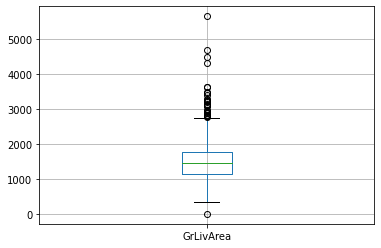

In [14]:
data[['GrLivArea']].boxplot();


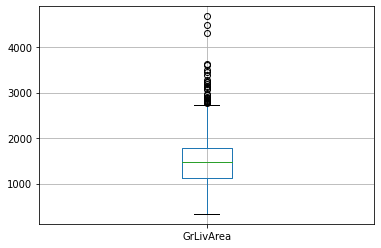

In [16]:
boolean_mask = (data['GrLivArea']>0) & (data['GrLivArea']<5000)

# Applying the boolean filteraing
data = data[boolean_mask].reset_index(drop=True)

# Visualize boxplot again
data[['GrLivArea']].boxplot();

## Scaling